# **Clustering**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving wine-clustering.csv to wine-clustering.csv


In [2]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['wine-clustering.csv']))

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

The data types in each column are appropriate.

In [5]:
data.isnull().any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

There are no missing values in our data.

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
round(data.corr(method="pearson"),3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000,0.094,0.212,-0.310,0.271,0.289,0.237,-0.156,0.137,0.546,-0.072,0.072,0.644
Malic_Acid,0.094,1.000,0.164,0.289,-0.055,-0.335,-0.411,0.293,-0.221,0.249,-0.561,-0.369,-0.192
Ash,0.212,0.164,1.000,0.443,0.287,0.129,0.115,0.186,0.010,0.259,-0.075,0.004,0.224
Ash_Alcanity,-0.310,0.289,0.443,1.000,-0.083,-0.321,-0.351,0.362,-0.197,0.019,-0.274,-0.277,-0.441
Magnesium,0.271,-0.055,0.287,-0.083,1.000,0.214,0.196,-0.256,0.236,0.200,0.055,0.066,0.393
Total_Phenols,0.289,-0.335,0.129,-0.321,0.214,1.000,0.865,-0.450,0.612,-0.055,0.434,0.700,0.498
Flavanoids,0.237,-0.411,0.115,-0.351,0.196,0.865,1.000,-0.538,0.653,-0.172,0.543,0.787,0.494
Nonflavanoid_Phenols,-0.156,0.293,0.186,0.362,-0.256,-0.450,-0.538,1.000,-0.366,0.139,-0.263,-0.503,-0.311
Proanthocyanins,0.137,-0.221,0.010,-0.197,0.236,0.612,0.653,-0.366,1.000,-0.025,0.296,0.519,0.330
Color_Intensity,0.546,0.249,0.259,0.019,0.200,-0.055,-0.172,0.139,-0.025,1.000,-0.522,-0.429,0.316


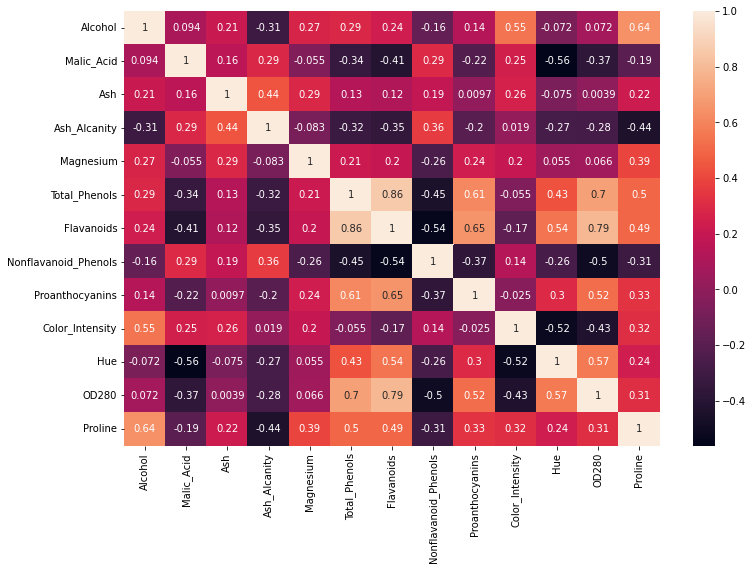

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

import seaborn as sns

sns.heatmap(data.corr(method="pearson"), annot=True)

We define strong positive correlation as between 0.7 and 1 and strong negative correlation as between -0.7 and -1.

In [9]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

data_scale = scale.fit_transform(data)

data_scale = pd.DataFrame(data_scale, columns=data.columns, index=data.index)
data_scale.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


We use the elbow method to determine the optimal number of clusters.

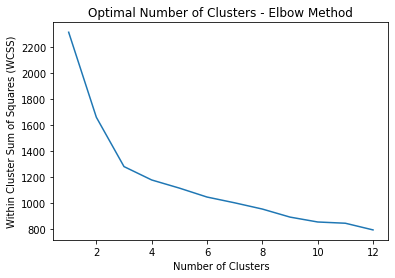

In [10]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,13):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
  kmeans.fit(data_scale)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,13), wcss)
plt.title("Optimal Number of Clusters - Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.show()

The decrease of WCSS becomes less rapid at k=3 therefore this is the optimal number of clusters for our analysis.

In [11]:
model = KMeans(n_clusters=3, init="k-means++", random_state=0)
y = model.fit_predict(data_scale)

Run Principal Component Analysis to reduce the dimensions.

In [12]:
from sklearn.decomposition import PCA

data_reduced = PCA(n_components=2).fit_transform(data_scale)
results = pd.DataFrame(data_reduced, columns=['PCA1','PCA2'])
results.head()

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


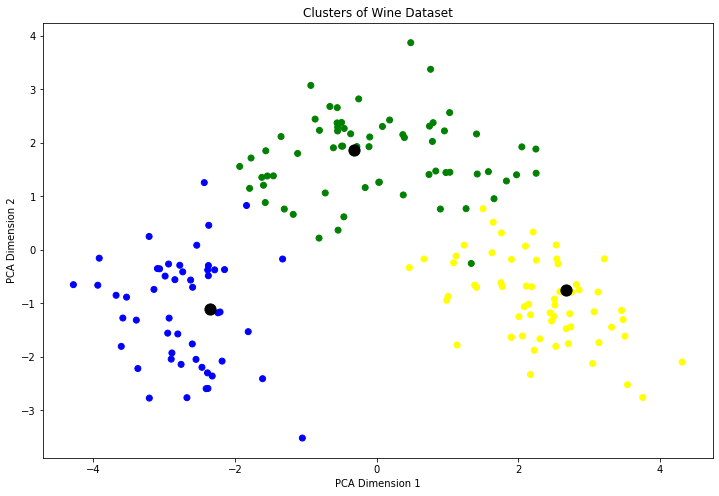

In [15]:
plt.figure(figsize=(12,8))

def plot_clusters(data, clusters):
    col_dic = {0:"blue", 1:"green", 2:"yellow"}
    colors = [col_dic[x] for x in clusters]
    plt.scatter(data[:,0], data[:,1], color = colors)
    centroids = model.cluster_centers_
    pca = PCA(n_components=2)
    centroids_pca = pca.fit_transform(centroids)
    plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker=".", s=500, c="black", label="Centroids")
    plt.title('Clusters of Wine Dataset')
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.show()

plot_clusters(data_reduced, y)

In [27]:
## Plot WCSS
wcss = model.inertia_
wcss

1278.7607763668148

In [29]:
import numpy as np
tss = np.sum(data_reduced[:,0:1]**2, axis = 0)
bcss = np.concatenate([tss - wcss]).ravel()
bcss

array([-441.11943133])

In [30]:
n_1 = (float(data_reduced.shape[0]) * float(data_reduced.shape[1])) - 1.0
tss = n_1 * np.var(data_reduced)
bcss = tss - wcss
bcss

-0.25951878053433575

# Hierarchical Clustering Analysis (HCA)

In [16]:

''' Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It is aka Hierarchicla 
CLustering Analysis(HCA)'''

# Import Library
import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine
import scipy.cluster.hierarchy as sch


# Hierarchical Dendrogram plot for Wine dataset

Text(0, 0.5, 'Euclidean distance in the space with other variables')

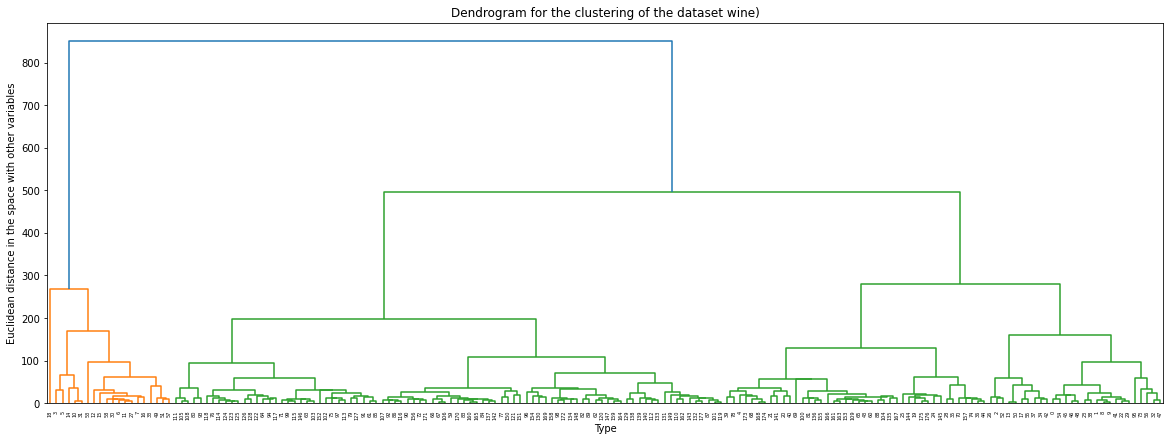

In [19]:
# Plotting of Dendrogram
wine_X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

#Decide the number of clusters by using this dendrogram
Z = sch.linkage(wine_X, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the wine dataset)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')


# Building an Agglomerative Clustering Model

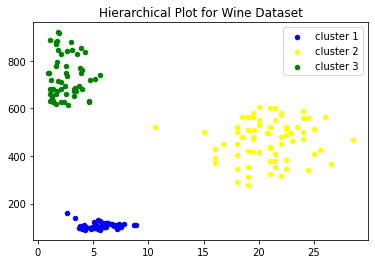

In [26]:
#Initialise Model

cluster_H = AgglomerativeClustering(n_clusters=3)
# Modelling the data
model_clt = cluster_H.fit(wine_X)
model_clt
pred1 = model_clt.labels_
pred1

# Plotting the HCA Cluster

plt.scatter(wine_X[pred1 == 0, 9], wine_X[pred1 == 0, 4], s = 20, c = 'blue', label = 'cluster 1')
plt.scatter(wine_X[pred1 == 1, 3], wine_X[pred1 == 1, 12], s = 20, c = 'yellow', label = 'cluster 2')
plt.scatter(wine_X[pred1 == 2, 1], wine_X[pred1 == 2, 12], s = 20, c = 'green', label = 'cluster 3')
plt.title('Hierarchical Plot for Wine Dataset')
plt.legend()


In [ ]:

import sklearn.metrics as sm

target = pd.DataFrame(data)
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
#fit the model on the dataset
HClustering.fit(wine_X)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)
